# Chapter 3 - Proposed approach
Version 0.6 - 9-10-2020 \
This notebook descibes all the pre-processing and processing steps that have been taken on our dataset including the final sample selection. \ 
masterdata location: /home/labuser/deeplearning/thesis/datasets/masterdata \


In [299]:
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import numpy as np
# fuzz is used to compare TWO strings https://towardsdatascience.com/how-to-do-fuzzy-matching-in-python-pandas-dataframe-6ce3025834a6
from fuzzywuzzy import fuzz
# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process
import shutil
from IPython.display import Image
from PIL import Image
%matplotlib inline

# Proposed approach

The image below shows the proposed approach as descibed in chapter 3.

![title](media/approach.png)

# Part 1 - Parsing and pre-processing 

We parssed all the data recieved form the VT dataset.

In [300]:
base = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
#Raw data from masterdataset
df = pd.read_pickle(os.path.join(base,'parsed.pkl'))

In [301]:
# total samples recieved from VT = 174830
df['path'].count()

347307

In [302]:
df

,path
0,/home/labuser/deeplearning/thesis/datasets/mas...
1,/home/labuser/deeplearning/thesis/datasets/mas...
2,/home/labuser/deeplearning/thesis/datasets/mas...
3,/home/labuser/deeplearning/thesis/datasets/mas...
4,/home/labuser/deeplearning/thesis/datasets/mas...
...,...
347302,/home/labuser/deeplearning/thesis/datasets/mas...
347303,/home/labuser/deeplearning/thesis/datasets/mas...
347304,/home/labuser/deeplearning/thesis/datasets/mas...
347305,/home/labuser/deeplearning/thesis/datasets/mas...


## Part 1.1 - Pre-processed data 
We selected samples that where detected by the Microsoft scanner as ground truth - 282650\
and fixed typos in the labels like:
'grandcrab', 'gandcrab'
'firecerb', 'cerber'
'critroni','critoni'


In [303]:
df['path']

0         /home/labuser/deeplearning/thesis/datasets/mas...
1         /home/labuser/deeplearning/thesis/datasets/mas...
2         /home/labuser/deeplearning/thesis/datasets/mas...
3         /home/labuser/deeplearning/thesis/datasets/mas...
4         /home/labuser/deeplearning/thesis/datasets/mas...
                                ...                        
347302    /home/labuser/deeplearning/thesis/datasets/mas...
347303    /home/labuser/deeplearning/thesis/datasets/mas...
347304    /home/labuser/deeplearning/thesis/datasets/mas...
347305    /home/labuser/deeplearning/thesis/datasets/mas...
347306    /home/labuser/deeplearning/thesis/datasets/mas...
Name: path, Length: 347307, dtype: object

In [304]:
df = pd.read_pickle(os.path.join(base,'preprocessed.pkl'))

In [305]:
df['scanner'] == 'Microsoft'

0         True
1         True
2         True
3         True
4         True
          ... 
282645    True
282646    True
282647    True
282648    True
282649    True
Name: scanner, Length: 282650, dtype: bool

In [306]:
df.result

0                         worm:win32/agent
1          trojandownloader:win32/upatre.a
2                      worm:win32/mira!rfn
3                trojan:win32/wacatac.b!ml
4                         worm:win32/agent
                        ...               
282645               trojan:win32/occamy.c
282646             pua:win32/downloadguide
282647                virus:win32/neshta.a
282648          trojan:win32/fuerboos.e!cl
282649    trojandropper:win32/miniduke!rfn
Name: result, Length: 282650, dtype: object

### Check for data entry errors - 

In [307]:
unique_label = df.result.unique().tolist()
sorted(unique_label)[:20]

['adware:win32/addlyrics',
 'adware:win32/adpeak',
 'adware:win32/adposhel',
 'adware:win32/adposhel.a',
 'adware:win32/adposhel.s!mtb',
 'adware:win32/adrotator',
 'adware:win32/bettersurf',
 'adware:win32/clariagain',
 'adware:win32/clickpotato',
 'adware:win32/eorezo',
 'adware:win32/hebogo',
 'adware:win32/hotbar',
 'adware:win32/kuaiba.a',
 'adware:win32/lollipop',
 'adware:win32/newdotnet',
 'adware:win32/oxypump.a',
 'adware:win32/oxypumper.sb',
 'adware:win32/qjwmonkey.a!msr',
 'adware:win32/ubar',
 'adware:win32/webcake']

In [308]:
#Create tuples of label names, matched label names, and the score
score_sort = [(x,) + i
             for x in unique_label 
             for i in process.extract(x, unique_label, scorer=fuzz.token_sort_ratio)]

In [309]:
similarity_sort = pd.DataFrame(score_sort, columns=['label_sort','match_sort','score_sort'])
similarity_sort.head()

,label_sort,match_sort,score_sort
0,worm:win32/agent,worm:win32/agent,100
1,worm:win32/agent,worm:win32/bagle,88
2,worm:win32/agent,worm:win32/agentp!rfn,86
3,worm:win32/agent,worm:win32/gate.a,85
4,worm:win32/agent,worm:win32/ainslot,82


In [310]:
#This file contains no duplicates samples
df = pd.read_pickle(os.path.join(base,'preprocessed_1.pkl'))

In [311]:
df['filehash'].count()

192282

In [312]:
df['result'].groupby(df['label']).value_counts()

label                    result                     
adware:win32/adposhel    adware:win32/adposhel          312
                         adware:win32/adposhel.a         20
                         adware:win32/adposhel.s!mtb      5
adware:win32/adrotator   adware:win32/adrotator           1
adware:win32/bettersurf  adware:win32/bettersurf          4
                                                       ... 
worm:win32/ypaul         worm:win32/ypaul                 1
worm:win32/yuner         worm:win32/yuner.a              66
                         worm:win32/yuner!rfn             1
worm:win64/boychi        worm:win64/boychi.a!sys          1
worm:winnt/lurka         worm:winnt/lurka.a               3
Name: result, Length: 3255, dtype: int64

In [313]:
#split label in type and variant
df[['type','variant']] = df.label.str.split("/",expand=True,)

### Malware types in dataset 

We have a list of malware types

In [314]:
df['type'].value_counts().head(10)

virus:win32               54344
trojan:win32              44551
worm:win32                21353
trojandropper:win32       14915
backdoor:win32            11446
trojandownloader:win32    10259
ransom:win32               7446
pua:win32                  6221
softwarebundler:win32      5288
backdoor:msil              4151
Name: type, dtype: int64

This figure shows distribution of malware types by sample count in our dataset between 2017 and 2020.

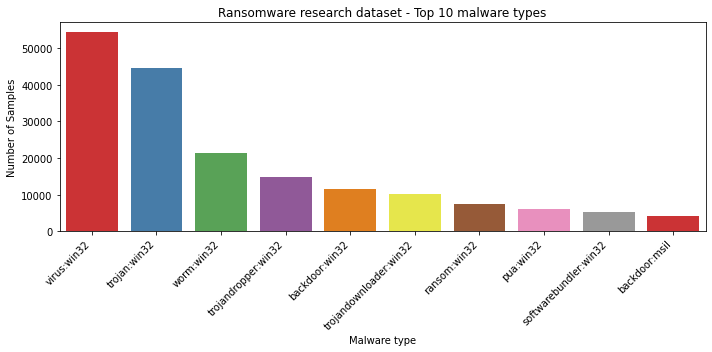

In [315]:
#Frequency plot 
plt.figure(figsize=(10,5))
chart = sns.countplot(x='type', data=df, order = df['type'].value_counts().head(10).index, palette='Set1')
chart.set_title("Ransomware research dataset - Top 10 malware types")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.xlabel("Malware type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.savefig('total_malware_in_vt_dataset.png')
plt.show()


We have a list of all malware types

In [316]:
df['label'].value_counts()

virus:win32/nabucur               26275
trojandropper:win32/gepys          7584
trojandownloader:win32/upatre      7488
trojan:win32/wacatac               6186
virus:win32/hematite               5385
                                  ...  
virtool:win32/cabornypt               1
trojanspy:win32/tofger                1
misleading:win32/systembooster        1
virtool:winnt/furootkit               1
worm:win32/sachiel                    1
Name: label, Length: 1803, dtype: int64

We added a fix to remove not found samples due to poor data quality

In [317]:
df = pd.read_pickle(os.path.join(base,'preprocessed_2.pkl')) 
print("After clean up {0} samples left".format(df.filehash.count()))

After clean up 174830 samples left


# Part 2 - Select ransomware samples

We selected samples identified by Microsoft as ransomware no benign images added yet.

In [318]:
df = pd.read_pickle(os.path.join(base,'preprocessed_2.pkl')) 


In [319]:
# Select only ransomware samples - 6404 
ransomware = df[df["result"].str.contains("Ransom:Win32",case=False,regex=False)]
ransomware['filehash'].count()

6404

In [320]:
#Sanity check duplicate filehashes need to be removed should be zero!!
ransomware['filehash'][ransomware.duplicated('filehash')].count()

0

## Part 2.1 - Select unique ransomware families in dataset

In [321]:
# else remove duplicates filehashes
#ransomware.drop_duplicates(subset ="filehash",keep = False, inplace = True) 

In [322]:
ransomware['label'].unique()

array(['ransom:win32/tescrypt', 'ransom:win32/gandcrab',
       'ransom:win32/locky', 'ransom:win32/crowti',
       'ransom:win32/wannacrypt', 'ransom:win32/milicry',
       'ransom:win32/teerac', 'ransom:win32/sagecrypt',
       'ransom:win32/cerber', 'ransom:win32/genasom',
       'ransom:win32/dotranos', 'ransom:win32/molock',
       'ransom:win32/wyhymyz', 'ransom:win32/enestaller',
       'ransom:win32/dharma', 'ransom:win32/cryakl',
       'ransom:win32/troldesh', 'ransom:win32/rantest',
       'ransom:win32/haperlock', 'ransom:win32/tovicrypt',
       'ransom:win32/petya', 'ransom:win32/spora',
       'ransom:win32/enestedel', 'ransom:win32/filecryptor',
       'ransom:win32/sodinokibi', 'ransom:win32/dmalocker',
       'ransom:win32/tobfy', 'ransom:win32/somhoveran',
       'ransom:win32/higuniel', 'ransom:win32/wadhrama',
       'ransom:win32/rackcrypt', 'ransom:win32/crysis',
       'ransom:win32/jaffrans', 'ransom:win32/cryptomole',
       'ransom:win32/nemreq', 'ransom:win3

In [323]:
a = ransomware['label'].unique() #53 ransomware families!!
print('There are {0} families present in the dataset'.format(str(len(a))))

There are 53 families present in the dataset


In [324]:
ransomware['label'].groupby(ransomware['filesizeKB']).value_counts()

filesizeKB  label                
7.938       ransom:win32/tescrypt    1
8.372       ransom:win32/cerber      1
8.510       ransom:win32/crowti      1
8.732       ransom:win32/crowti      1
8.829       ransom:win32/gandcrab    1
                                    ..
417.988     ransom:win32/tescrypt    1
418.829     ransom:win32/tescrypt    1
420.561     ransom:win32/tescrypt    1
425.081     ransom:win32/tescrypt    1
425.525     ransom:win32/tescrypt    1
Name: label, Length: 5983, dtype: int64

In [325]:
#Sanity check  6190 ransomware samples in top 10
print('There are {0} samples in the top 10 based on sample count'.format(sum(ransomware['label'].value_counts().sort_values(ascending=False).head(10))))


There are 6190 samples in the top 10 based on sample count


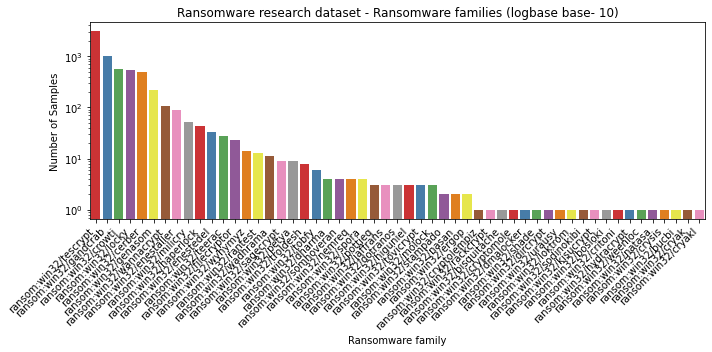

In [326]:
#final frequency plot top 10 Ransomware families - log scale
plt.figure(figsize=(10,5))
chart = sns.countplot(x='label', data=ransomware, order = ransomware['label'].value_counts().index, palette='Set1')
chart.set_title("Ransomware research dataset - Ransomware families (logbase base- 10)")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
chart.set(yscale="log")
plt.xlabel("Ransomware family")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.savefig(os.path.join(base,'total_ransomware_in_vt_dataset.png'))
plt.show()

# Part 3 -  Processing - binary2image
We convert the binary to image using the python binary2image.py script on '/home/labuser/deeplearning/thesis/dataset/interim' folder

The software was found on https://github.com/ncarkaci/binary-to-imagehttps://github.com/ncarkaci/binary-to-image




In [327]:
# /solutions/binary-to-image/python3 binary2image.py
# /dataman/python3 imagesize.py
# and adding benign data

![title](media/conversion.png)

After the conversion we collect the image size by running the python imagesize.py script

In [328]:
ransomware = pd.read_pickle(os.path.join(base,'images_size.pkl'))
ransomware['path'].count()
print('There are {0} samples present in the dataset.'.format(str(ransomware['path'].count())))

There are 7326 samples present in the dataset.


# Part 4 - Select images 

We selected images based on their size to get maximum features for the CNN and optimum number of samples by family \


In [329]:
ransomware = pd.read_pickle(os.path.join(base,'images_size.pkl'))

In [330]:
print('Training data average (width, height): ', (np.mean(ransomware['imagesize_w']), np.mean(ransomware['imagesize_h'])))
print('Training data (minimum width, maximum width): ', (np.min(ransomware['imagesize_w']), np.max(ransomware['imagesize_w'])))
print('Training data (minimum height, maximum height): ', (np.min(ransomware['imagesize_h']), np.max(ransomware['imagesize_h'])))
print('Training data (STD of widths, STD of heights): ', (np.std(ransomware['imagesize_w']), np.std(ransomware['imagesize_h'])))

Training data average (width, height):  (321.2055692055692, 374.3024843024843)
Training data (minimum width, maximum width):  (32, 1024)
Training data (minimum height, maximum height):  (2, 10049)
Training data (STD of widths, STD of heights):  (155.75548380752028, 238.43001701382158)


<Figure size 720x360 with 0 Axes>

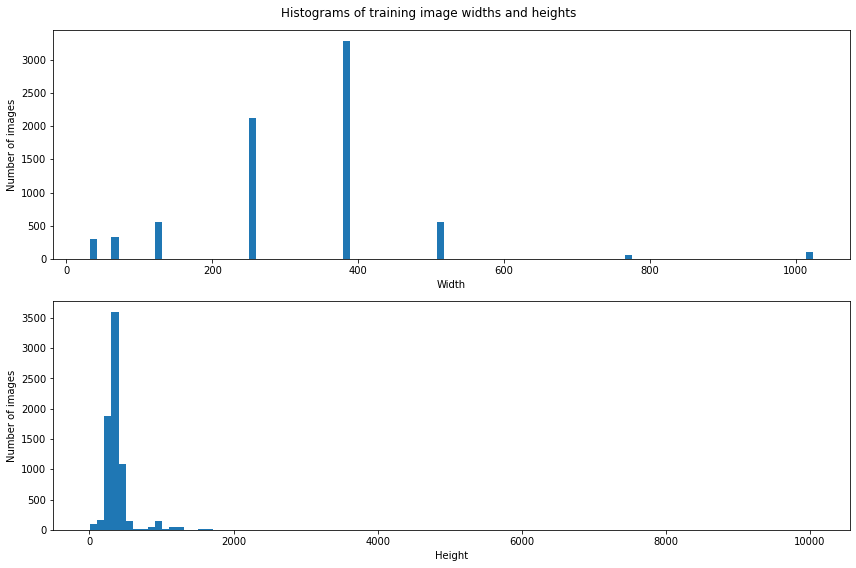

In [331]:
plt.figure(figsize=(10,5))
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))
fig.suptitle('Histograms of training image widths and heights')
ax1.hist(ransomware['imagesize_w'], bins=100)
ax1.set_xlabel('Width') 
ax1.set_ylabel('Number of images')
ax2.hist(ransomware['imagesize_h'], bins=100) 
ax2.set_xlabel('Height')
ax2.set_ylabel('Number of images')
plt.tight_layout()
plt.savefig(os.path.join(base,'ransomware_image_size_vt_dataset.png'))
plt.show()

In [332]:
ransomware['imagesize_w'].value_counts()

384     3277
256     2120
512      560
128      559
64       326
32       308
1024     109
768       67
Name: imagesize_w, dtype: int64

In [333]:
ransomware['imagesize_h'].value_counts()

342    134
292    130
320    127
324    122
286    116
      ... 
26       1
34       1
62       1
66       1
8        1
Name: imagesize_h, Length: 560, dtype: int64

### File sizes ransomware images

We check the file size in bytes images.

In [334]:
ransomware['filesize'] # in bytes!!
print('Training data average file size: ', (np.mean(ransomware['filesize'])))
print('Training data (minimum and maximum): ', (np.min(ransomware['filesize']), np.max(ransomware['filesize'])))
print('Training data (STD): ', (np.std(ransomware['filesize'])))

Training data average file size:  317098.24215124216
Training data (minimum and maximum):  (237, 29194448)
Training data (STD):  531018.2178847467


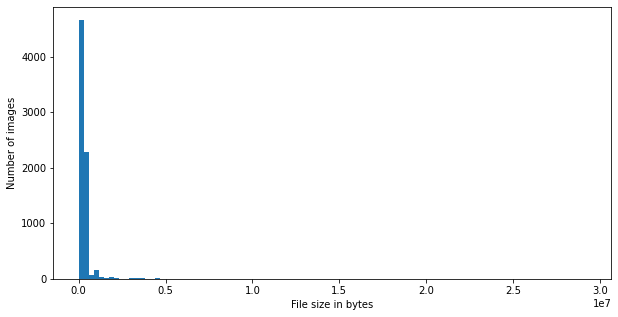

In [335]:
plt.figure(figsize=(10,5))
plt.hist(ransomware['filesize'], bins=100)
plt.xlabel('File size in bytes')
plt.ylabel('Number of images')
plt.savefig('ransomware_image_filesize_vt_dataset.png')
plt.show()

In [336]:
#smallest - height 
ransomware['imagesize_h'].min()

2

In [337]:
#smallest width
ransomware['imagesize_w'].min()

32

In [338]:
#calulate dimensions - features size (Saxe and Chen, 2018)
ransomware['features'] = ransomware ['imagesize_w'] * ransomware ['imagesize_h'] * 3
ransomware['ratio'] = ransomware ['imagesize_w'] / ransomware ['imagesize_w']


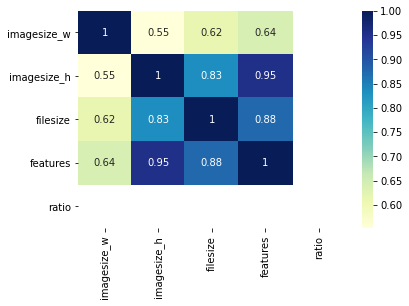

In [339]:
#Images size  analisys
sns.heatmap(ransomware.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [340]:
print('Features {}'.format(224*224*3)) # maximum features minimum of 224x224
ransomware[(ransomware ['imagesize_w'] >= 224) & (ransomware['imagesize_h'] >= 224)]# Default CNN input 224x224x3 = 6133 


Features 150528


,path,label,imagesize_w,imagesize_h,filesize,features,ratio
2,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221442,326016,1.0
3,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221441,326016,1.0
4,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221443,326016,1.0
5,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221442,326016,1.0
6,/home/labuser/deeplearning/thesis/datasets/int...,shade,512,635,968182,975360,1.0
...,...,...,...,...,...,...,...
7312,/home/labuser/deeplearning/thesis/datasets/int...,spora,256,274,163539,210432,1.0
7315,/home/labuser/deeplearning/thesis/datasets/int...,petya,256,342,195683,262656,1.0
7320,/home/labuser/deeplearning/thesis/datasets/int...,petya,384,356,266019,410112,1.0
7324,/home/labuser/deeplearning/thesis/datasets/int...,rackcrypt,1024,1260,3792011,3870720,1.0


In [341]:
print('Features {}'.format(112*122*3)) # features 224/2
ransomware[(ransomware ['imagesize_w'] >= 112) & (ransomware['imagesize_h'] >= 112)]# CNN input 112x112x3 == 6692

Features 40992


,path,label,imagesize_w,imagesize_h,filesize,features,ratio
0,/home/labuser/deeplearning/thesis/datasets/int...,nasan,128,360,107778,138240,1.0
1,/home/labuser/deeplearning/thesis/datasets/int...,nasan,128,360,107760,138240,1.0
2,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221442,326016,1.0
3,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221441,326016,1.0
4,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221443,326016,1.0
...,...,...,...,...,...,...,...
7321,/home/labuser/deeplearning/thesis/datasets/int...,petya,128,392,115002,150528,1.0
7322,/home/labuser/deeplearning/thesis/datasets/int...,petya,128,392,115038,150528,1.0
7323,/home/labuser/deeplearning/thesis/datasets/int...,petya,128,394,114981,151296,1.0
7324,/home/labuser/deeplearning/thesis/datasets/int...,rackcrypt,1024,1260,3792011,3870720,1.0


In [342]:
#Selection on minimum images size 128 x 128 x 3 Results in no Benign samples in the dataset == 7018
print('Features {}'.format(128*128*3))
ransomware[(ransomware ['imagesize_w'] > 128) & (ransomware['imagesize_h'] > 128)]

Features 49152


,path,label,imagesize_w,imagesize_h,filesize,features,ratio
2,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221442,326016,1.0
3,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221441,326016,1.0
4,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221443,326016,1.0
5,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221442,326016,1.0
6,/home/labuser/deeplearning/thesis/datasets/int...,shade,512,635,968182,975360,1.0
...,...,...,...,...,...,...,...
7312,/home/labuser/deeplearning/thesis/datasets/int...,spora,256,274,163539,210432,1.0
7315,/home/labuser/deeplearning/thesis/datasets/int...,petya,256,342,195683,262656,1.0
7320,/home/labuser/deeplearning/thesis/datasets/int...,petya,384,356,266019,410112,1.0
7324,/home/labuser/deeplearning/thesis/datasets/int...,rackcrypt,1024,1260,3792011,3870720,1.0


In [343]:
#Selection on minimum images size 64 x 64 x 3  Results in no Benign samples in the dataset == 7018
print('Features {}'.format(64*64*3))
ransomware[(ransomware ['imagesize_w'] > 64) & (ransomware['imagesize_h'] > 64)]

Features 12288


,path,label,imagesize_w,imagesize_h,filesize,features,ratio
0,/home/labuser/deeplearning/thesis/datasets/int...,nasan,128,360,107778,138240,1.0
1,/home/labuser/deeplearning/thesis/datasets/int...,nasan,128,360,107760,138240,1.0
2,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221442,326016,1.0
3,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221441,326016,1.0
4,/home/labuser/deeplearning/thesis/datasets/int...,dharma,384,283,221443,326016,1.0
...,...,...,...,...,...,...,...
7321,/home/labuser/deeplearning/thesis/datasets/int...,petya,128,392,115002,150528,1.0
7322,/home/labuser/deeplearning/thesis/datasets/int...,petya,128,392,115038,150528,1.0
7323,/home/labuser/deeplearning/thesis/datasets/int...,petya,128,394,114981,151296,1.0
7324,/home/labuser/deeplearning/thesis/datasets/int...,rackcrypt,1024,1260,3792011,3870720,1.0


In [344]:
#Selection on minimum images size 32 x 32 x 3  Results in no Benign samples in the dataset == 7018
print('Features {}'.format(32*32*3))
ransomware[(ransomware ['imagesize_w'] > 32) & (ransomware ['imagesize_w'] > 32)]
ransomware['ratio'] = ransomware ['imagesize_w'] / ransomware ['imagesize_w']

Features 3072


### Part 4.1 - Effects of reshaping and resizing - image Distortion

Show the effects of reshaping a image from ( m x n) into (m x m) of one sample.

In [345]:
showdistortion = ransomware[(ransomware ['imagesize_w'] == 32) & (ransomware ['imagesize_w'] <112)].head(1)

In [346]:
path = showdistortion['path'].values[0]
path

'/home/labuser/deeplearning/thesis/datasets/interim/genasom/92559310933618d709811373a1447d938cc300189a700999001458696cfc38d9.png'

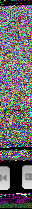

In [347]:
from PIL import Image
Image.open(path)

In [348]:
img = Image.open(path)
img.save(os.path.join(base,'undistorted_sample_32.png'))
img = Image.open(os.path.join(base,'undistorted_sample_32.png'))
new_width  = 244
new_height = 244
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save(os.path.join(base,'distorted_sample_32_224.png'))


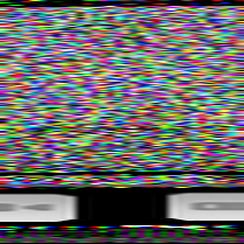

In [349]:
Image.open(os.path.join(base,'distorted_sample_32_224.png'))

In [350]:
nodistortion = ransomware[(ransomware ['imagesize_w'] >= 112) & (ransomware ['imagesize_w'] >=112)].head(1)

In [351]:
path = nodistortion['path'].values[0]

In [352]:
img = Image.open(path)
img.save(os.path.join(base,'undistorted_sample_112.png'))

img = Image.open(path)
new_width  = 299
new_height = 299
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save(os.path.join(base,'distorted_sample_112_299.png'))

img = Image.open(path)
new_width  = 244
new_height = 244
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save(os.path.join(base,'distorted_sample_112_244.png'))

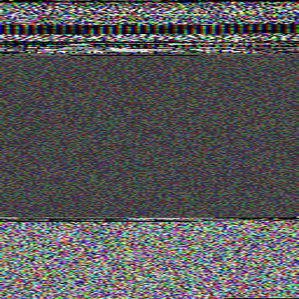

In [353]:
Image.open(os.path.join(base,'distorted_sample_112_299.png'))


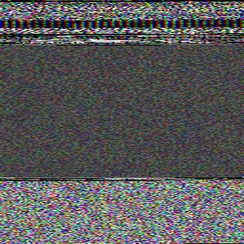

In [354]:
Image.open(os.path.join(base,'distorted_sample_112_244.png'))

## Part 4.2 - Final selection

We selected images with a minimum size of 112 x 112 

In [355]:
preselection = ransomware[(ransomware ['imagesize_w'] >= 112) & (ransomware['imagesize_h'] >= 112)]# CNN input 112x112x3 == 6692
preselection['label'].value_counts()

tescrypt        3071
gandcrab         994
crowti           556
locky            538
cerber           488
benign           358
genasom          201
wannacrypt       104
enestaller        88
milicry           51
haperlock         44
enestedel         33
teerac            28
filecryptor       20
wyhymyz           14
rantest           13
wadhrama          11
sagecrypt          9
petya              8
troldesh           8
tobfy              6
dharma             4
nemreq             4
somhoveran         4
dotranos           3
pottieq            3
molock             3
higuniel           3
spora              2
nasan              2
stampado           2
cryptolempiz       1
jaffrans           1
critoni            1
weenloc            1
shade              1
crysis             1
dmalocker          1
bosloki            1
ergop              1
dircrypt           1
cryak              1
hydracrypt         1
bisquitache        1
tovicrypt          1
sodinokibi         1
kisucrypt          1
rackcrypt    

we selected only sample classes of a minum of 100 samples per class.

In [356]:
# Selection of Minimum of 100 samples per family #100 samples = 80 samples (80% train) 20 samples (20% validation) 10 samples (10% test)
preselection.groupby('label').filter(lambda x: len(x) >= 100)

,path,label,imagesize_w,imagesize_h,filesize,features,ratio
12,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,921,1110074,1414656,1.0
13,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,917,1061066,1408512,1.0
14,/home/labuser/deeplearning/thesis/datasets/int...,genasom,1024,1592,4624646,4890624,1.0
15,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,939,1057168,1442304,1.0
16,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,923,1078239,1417728,1.0
...,...,...,...,...,...,...,...
7289,/home/labuser/deeplearning/thesis/datasets/int...,cerber,384,270,231489,311040,1.0
7290,/home/labuser/deeplearning/thesis/datasets/int...,cerber,256,313,194357,240384,1.0
7291,/home/labuser/deeplearning/thesis/datasets/int...,cerber,256,350,199573,268800,1.0
7292,/home/labuser/deeplearning/thesis/datasets/int...,cerber,512,435,248026,668160,1.0


In [357]:
# Selection of Minimum of 50 samples per family #50 samples = 35 samples (80% train) 15 samples (20% validation) 5 samples (10% test)
preselection.groupby('label').filter(lambda x: len(x) >= 50)

,path,label,imagesize_w,imagesize_h,filesize,features,ratio
12,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,921,1110074,1414656,1.0
13,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,917,1061066,1408512,1.0
14,/home/labuser/deeplearning/thesis/datasets/int...,genasom,1024,1592,4624646,4890624,1.0
15,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,939,1057168,1442304,1.0
16,/home/labuser/deeplearning/thesis/datasets/int...,genasom,512,923,1078239,1417728,1.0
...,...,...,...,...,...,...,...
7289,/home/labuser/deeplearning/thesis/datasets/int...,cerber,384,270,231489,311040,1.0
7290,/home/labuser/deeplearning/thesis/datasets/int...,cerber,256,313,194357,240384,1.0
7291,/home/labuser/deeplearning/thesis/datasets/int...,cerber,256,350,199573,268800,1.0
7292,/home/labuser/deeplearning/thesis/datasets/int...,cerber,512,435,248026,668160,1.0


We selected a minimum of 100 samples per class.

In [358]:
#total samples in dataset - 100 per class
preselection = preselection.groupby('label').filter(lambda x: len(x) >= 100)
preselection['path'].count()

6310

In [359]:
preselection.describe()

,imagesize_w,imagesize_h,filesize,features,ratio
count,6310.000000,6310.000000,6.310000e+03,6.310000e+03,6310.0
mean,348.358796,387.814422,3.451934e+05,4.617113e+05,1.0
std,137.910400,247.860900,5.585619e+05,7.825655e+05,0.0
min,128.000000,241.000000,2.136600e+04,9.254400e+04,1.0
25%,256.000000,303.000000,1.991542e+05,2.582400e+05,1.0
50%,384.000000,339.000000,2.516885e+05,3.363840e+05,1.0
75%,384.000000,395.000000,3.288070e+05,4.170240e+05,1.0
max,1024.000000,10049.000000,2.919445e+07,3.087053e+07,1.0


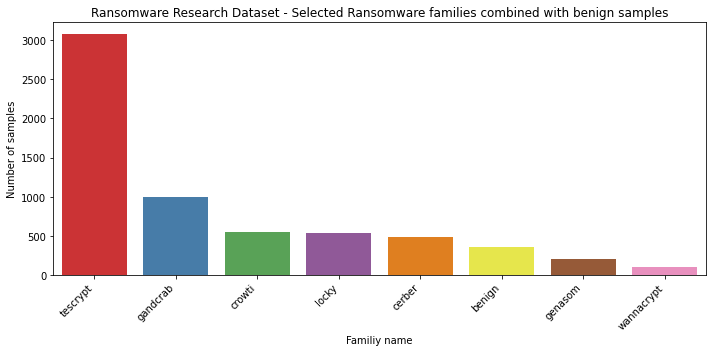

In [360]:
#final plot Ransomware families + benign
plt.figure(figsize=(10,5))
chart = sns.countplot(x='label', data=preselection, order = preselection['label'].value_counts().index, palette='Set1')
chart.set_title("Ransomware Research Dataset - Selected Ransomware families combined with benign samples")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.xlabel('Familiy name')
plt.ylabel('Number of samples')
plt.tight_layout()
plt.savefig(os.path.join(base,'final_rrd.png'))
plt.show()


In [361]:
preselection['label'].value_counts()
#Ratio smalles vs largest
3071/104

29.528846153846153

# Part 5 - Final Training and Test split - 10% hold-out

Using the 10% hold-out method for testing the tained models https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f

The process.py scipt generates the trainset and testset.

In [362]:
ransomware_train = pd.read_pickle(os.path.join(base,'trainset.pkl'))

In [363]:
ransomware_train['path'].count()

5679

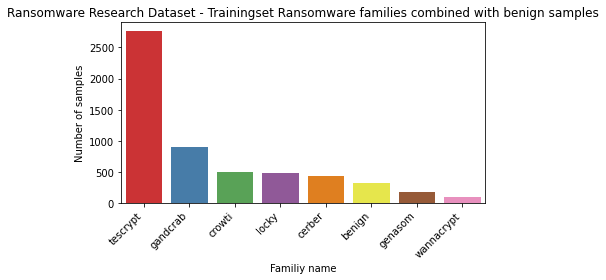

In [364]:
#final plot Ransomware families + benign - Train
chart = sns.countplot(x='label', data=ransomware_train, order = ransomware_train['label'].value_counts().index, palette='Set1')
chart.set_title("Ransomware Research Dataset - Trainingset Ransomware families combined with benign samples")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.xlabel('Familiy name')
plt.ylabel('Number of samples')
plt.tight_layout()
plt.savefig(os.path.join(base,'train_selected_rrd.png'))
plt.show()

In [365]:
ransomware_test = pd.read_pickle(os.path.join(base,'testset.pkl'))

In [366]:
ransomware_test['path'].count()

631

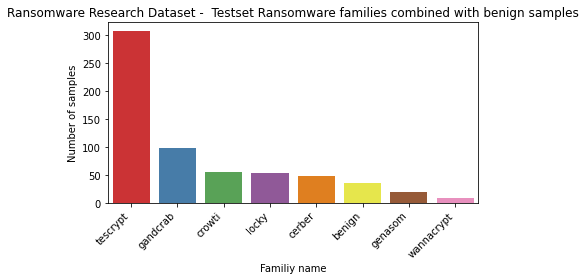

In [367]:
#final plot Ransomware families + benign - Test
chart = sns.countplot(x='label', data=ransomware_test, order = ransomware_test['label'].value_counts().index, palette='Set1')
chart.set_title("Ransomware Research Dataset -  Testset Ransomware families combined with benign samples")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.xlabel('Familiy name')
plt.ylabel('Number of samples')
plt.tight_layout()
plt.savefig(os.path.join(base,'test_selected_rrd.png'))
plt.show()